In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch

In [2]:
df = pd.read_csv(r"C:\Users\Hp\Downloads\Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df1=df.copy()

In [4]:
# Separate country names & features
countries = df1['country']
features = df1.iloc[:, 1:]

In [5]:
countries.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [6]:
features.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
# Check for missing values & duplicates
print("Missing values per column:\n", df1.isnull().sum())
print("\nDuplicate rows:", df1.duplicated().sum())
print("\nData Description:\n", features.describe())

Missing values per column:
 country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Duplicate rows: 0

Data Description:
        child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.00

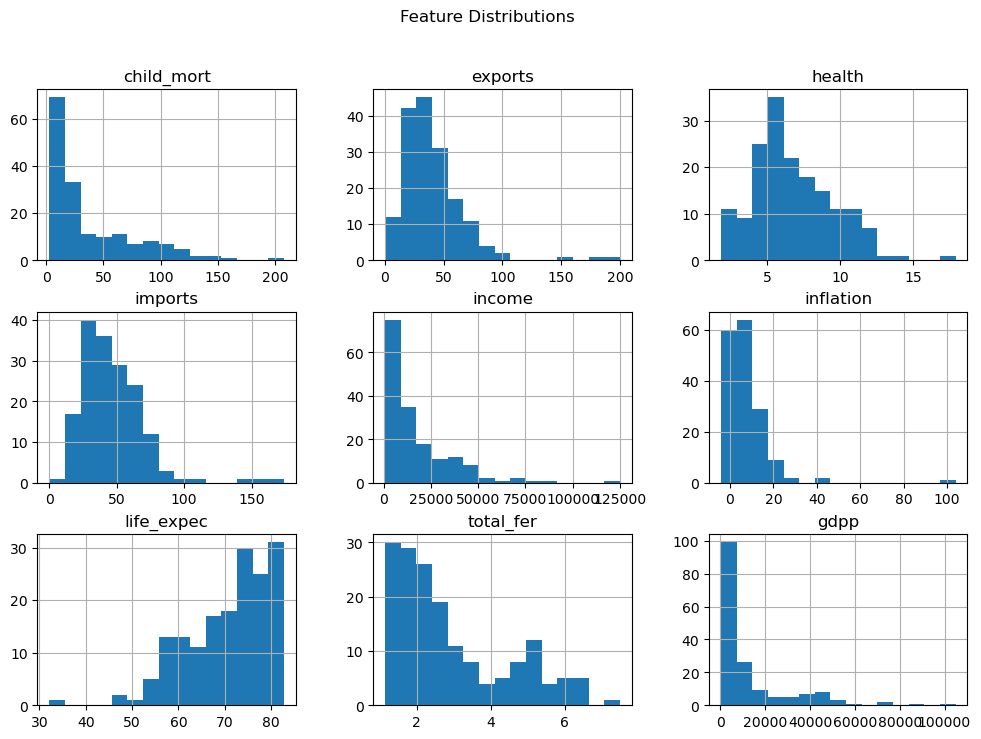

In [8]:
# Histograms to visualize feature distributions
features.hist(figsize=(12, 8), bins=15)
plt.suptitle("Feature Distributions")
plt.show()

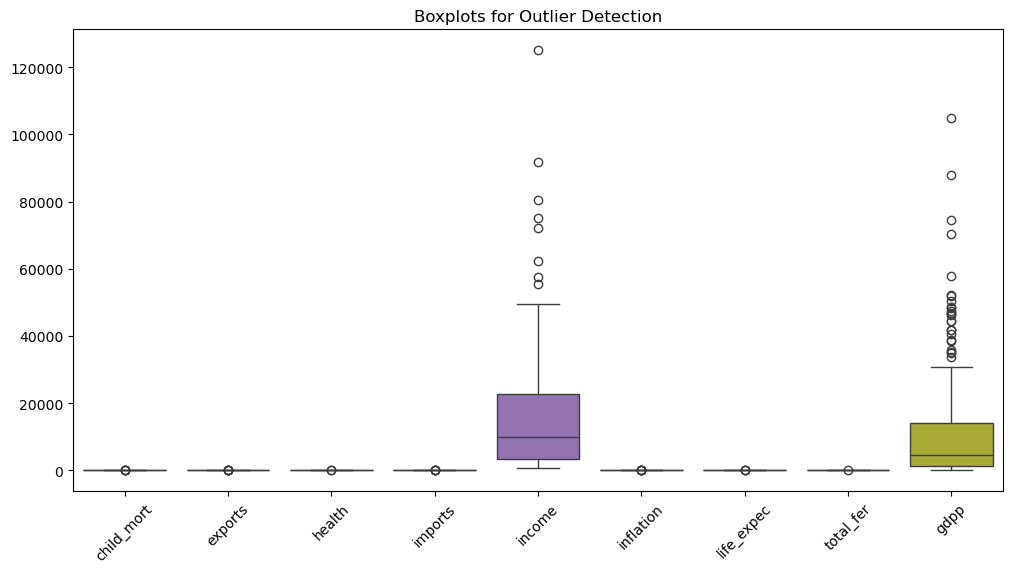

In [9]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=features)
plt.title("Boxplots for Outlier Detection")
plt.xticks(rotation=45)
plt.show()


In [10]:
# Function to check outliers using IQR method
def check_for_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nColumn: {col}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of outliers: {len(outliers)}")
    print(outliers[[col]])

check_for_outliers(df1, 'income')
check_for_outliers(df1, 'gdpp')



Column: income
Lower Bound: -25812.5
Upper Bound: 51967.5
Number of outliers: 8
     income
23    80600
82    75200
91    91700
114   62300
123  125000
133   72100
145   55500
157   57600

Column: gdpp
Lower Bound: -17750.0
Upper Bound: 33130.0
Number of outliers: 25
       gdpp
7     51900
8     46900
15    44400
23    35300
29    47400
44    58000
53    46200
54    40600
58    41800
68    41900
73    48700
75    35800
77    44500
82    38500
91   105000
110   50300
111   33700
114   87800
123   70300
133   46600
144   52100
145   74600
157   35000
158   38900
159   48400


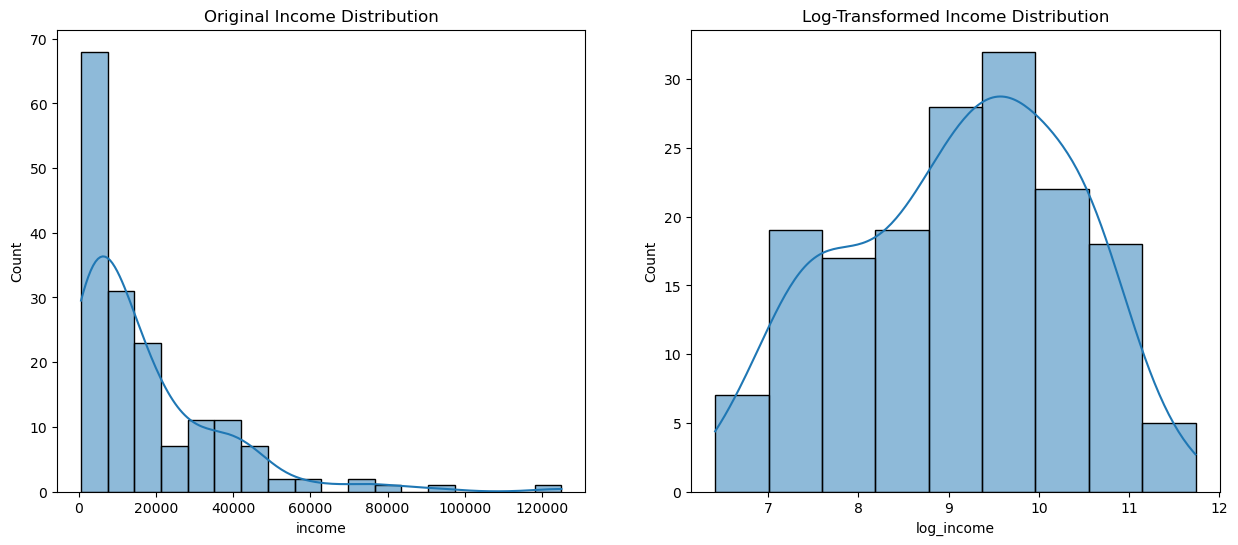

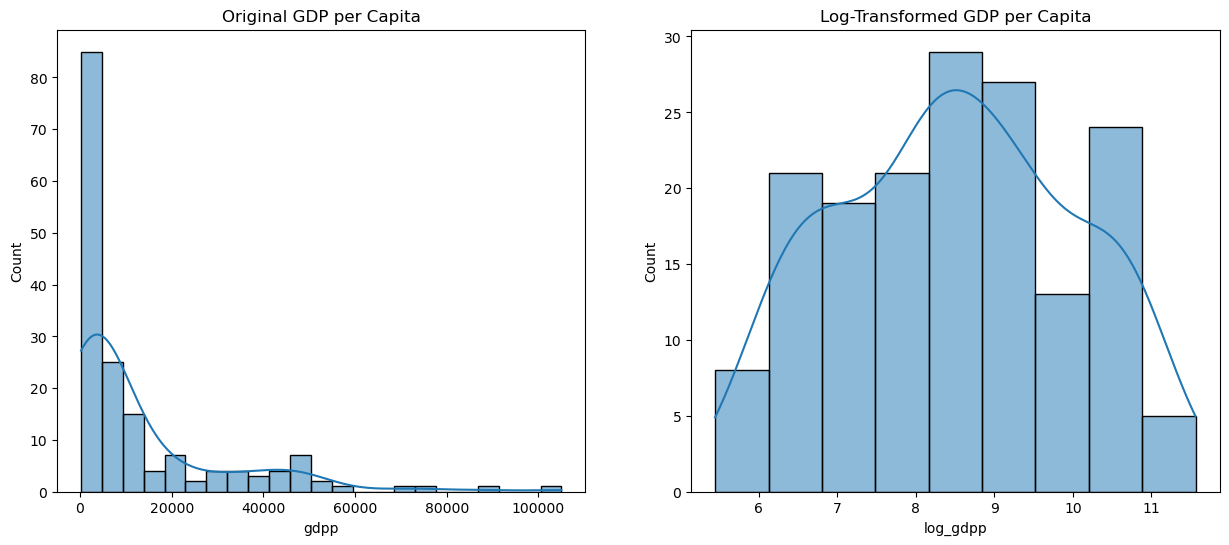

In [11]:
df1['log_income'] = np.log(df1['income'])
df1['log_gdpp'] = np.log(df1['gdpp'])

# Compare original vs log
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1['income'], kde=True)
plt.title('Original Income Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df1['log_income'], kde=True)
plt.title('Log-Transformed Income Distribution')
plt.show()

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1['gdpp'], kde=True)
plt.title('Original GDP per Capita')
plt.subplot(1, 2, 2)
sns.histplot(df1['log_gdpp'], kde=True)
plt.title('Log-Transformed GDP per Capita')
plt.show()

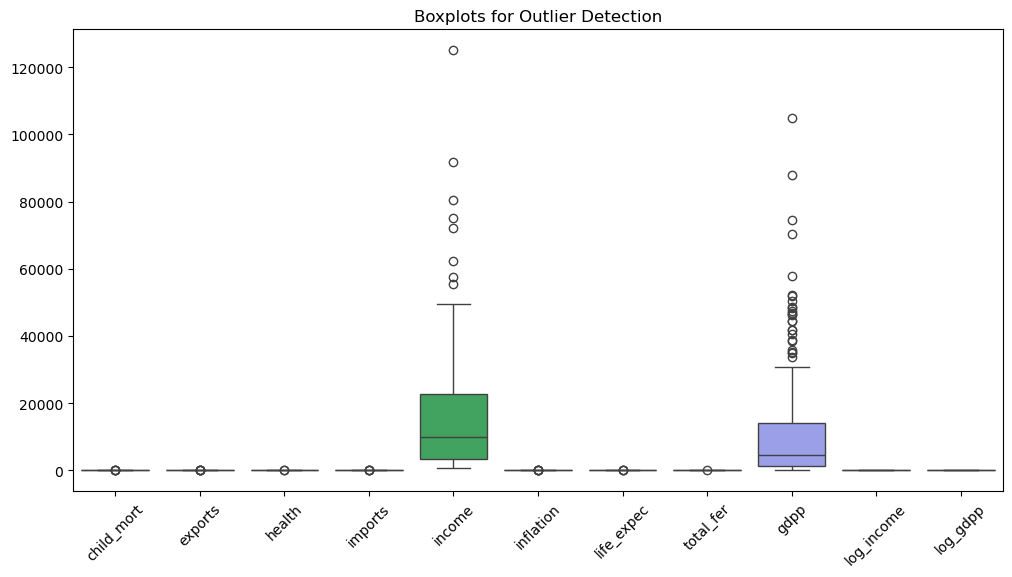

In [12]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1)
plt.title("Boxplots for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [13]:
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,log_income,log_gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,7.383989,6.315358
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,9.203316,8.316300
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,9.464983,8.402904
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,8.682708,8.169053
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,9.857444,9.409191


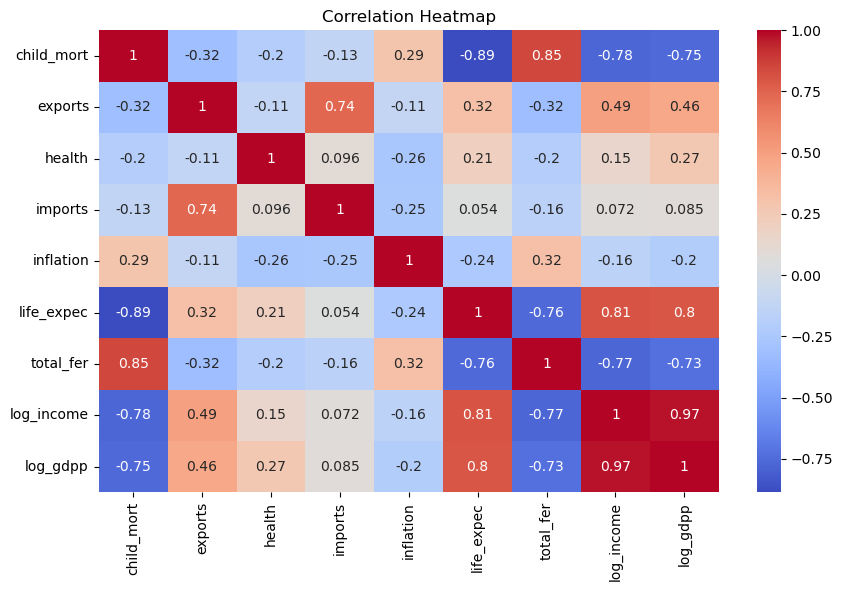

In [14]:
# Correlation heatmap
features = df1.drop(columns=["country", "income", "gdpp"])
plt.figure(figsize=(10, 6))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

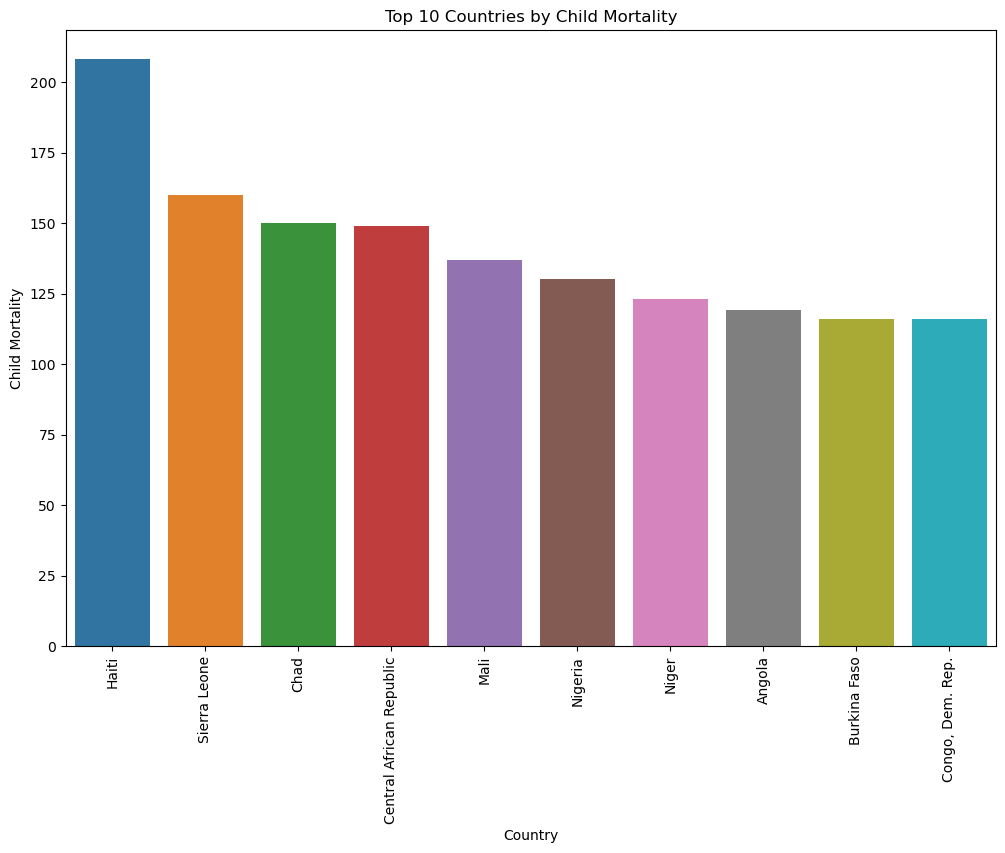

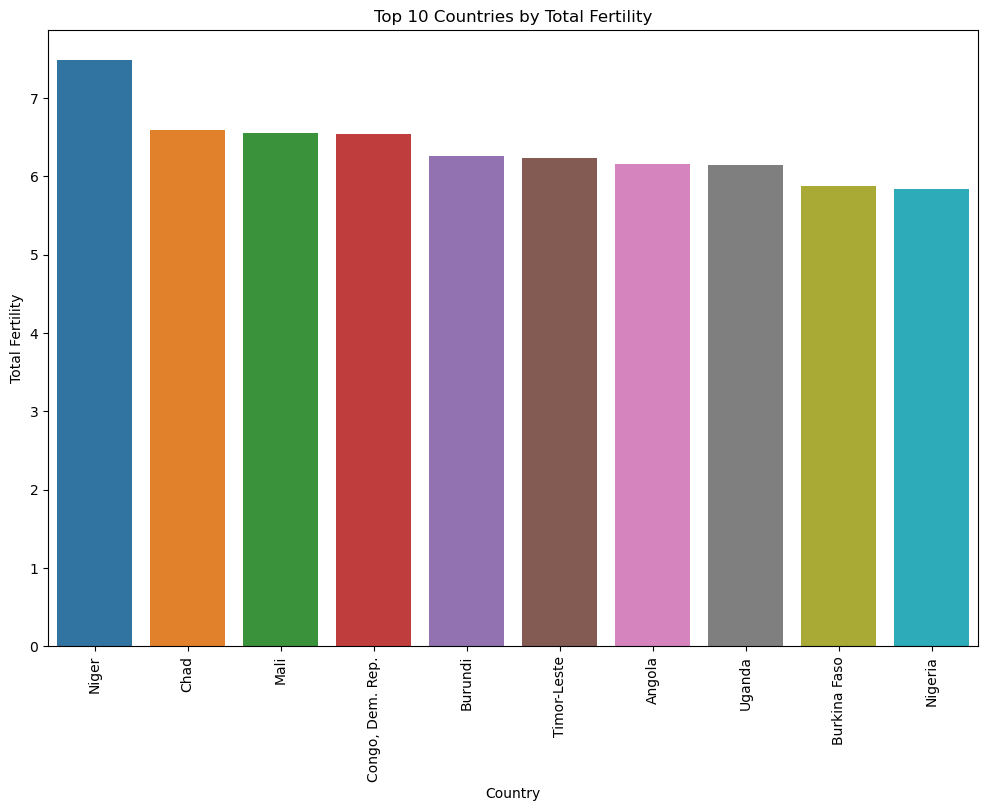

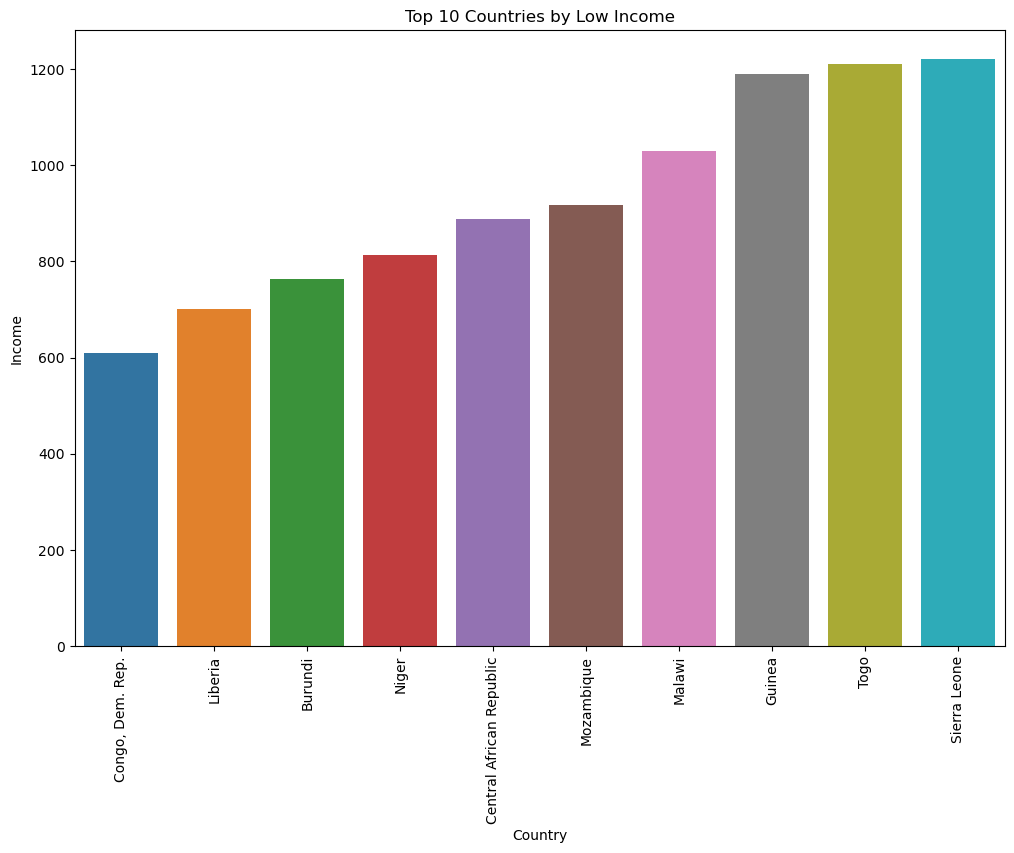

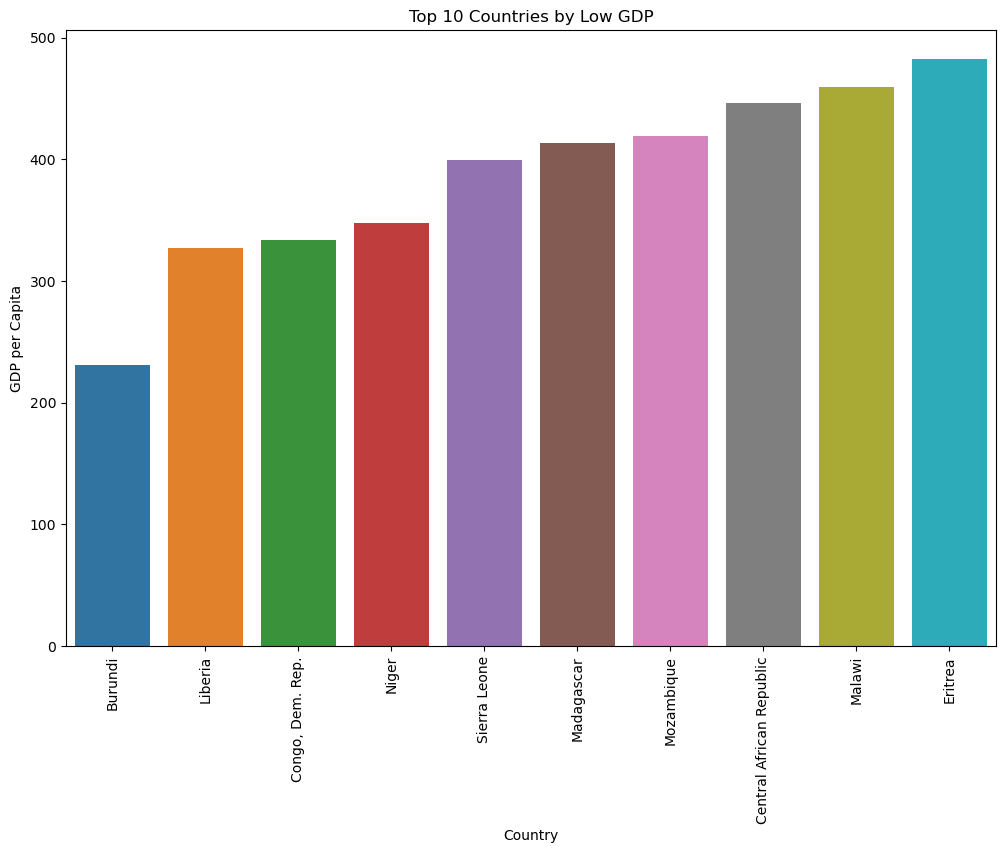

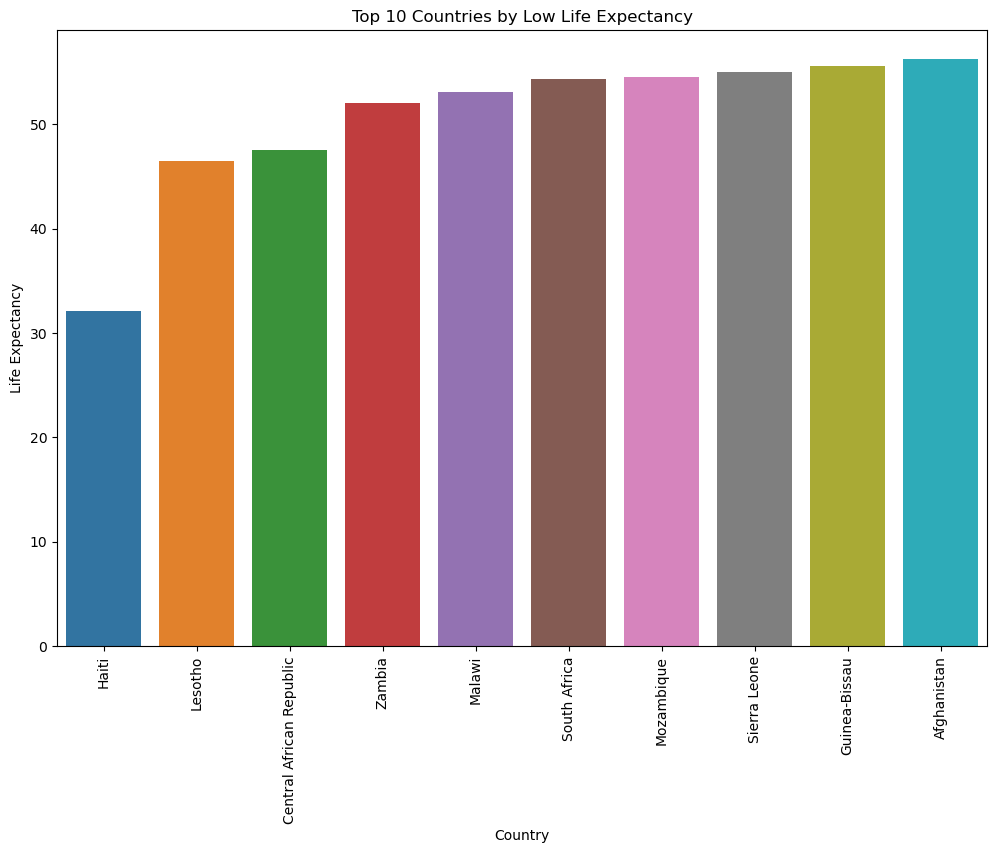

In [15]:
def plot_top_10(df, col, ascending, ylabel, title):
    top_10 = df.sort_values(col, ascending=ascending).head(10)
    plt.figure(figsize=(12, 8))
    sns.barplot(x='country', y=col, data=top_10, hue='country', palette="tab10", legend=False)
    plt.title(title)
    plt.xlabel('Country')
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()

plot_top_10(df, 'child_mort', False, 'Child Mortality', 'Top 10 Countries by Child Mortality')
plot_top_10(df, 'total_fer', False, 'Total Fertility', 'Top 10 Countries by Total Fertility')
plot_top_10(df, 'income', True, 'Income', 'Top 10 Countries by Low Income')
plot_top_10(df, 'gdpp', True, 'GDP per Capita', 'Top 10 Countries by Low GDP')
plot_top_10(df, 'life_expec', True, 'Life Expectancy', 'Top 10 Countries by Low Life Expectancy')

In [16]:
# Country-level Need Score (Before Clustering)
cols = ['child_mort', 'total_fer', 'income', 'gdpp', 'life_expec']

# Standardize only for scoring 
country_scores = df1.copy()
scaler = StandardScaler()
country_scores[cols] = scaler.fit_transform(country_scores[cols])

# Need score formula: high mortality & fertility = more need,
# high income, GDP, life expectancy = less need
country_scores['Need_Score'] = (
    country_scores['child_mort'] +
    country_scores['total_fer'] -
    country_scores['income'] -
    country_scores['gdpp'] -
    country_scores['life_expec']
)

# Rank countries by need (highest first)
country_need_rank = country_scores[['country', 'Need_Score']].sort_values(
    by='Need_Score', ascending=False
).reset_index(drop=True)

print("\nTop 10 Countries by Individual Need Score:")
print(country_need_rank.head(10))

# Save country-level ranking to CSV
country_need_rank.to_csv('country_level_need_ranking.csv', index=False)



Top 10 Countries by Individual Need Score:
                    country  Need_Score
0                     Haiti   10.298787
1  Central African Republic    8.383809
2                      Chad    8.229056
3                     Niger    7.982551
4              Sierra Leone    7.790179
5                      Mali    7.554348
6          Congo, Dem. Rep.    7.337080
7              Burkina Faso    6.792151
8                Mozambique    6.632340
9                   Burundi    6.569477


In [17]:
#  Scaling
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(features)

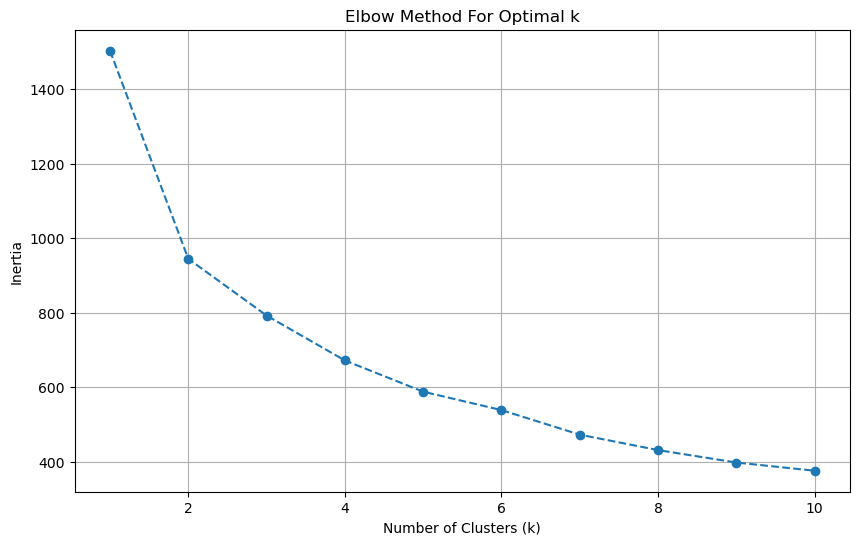

Optimal K (K-means): 2


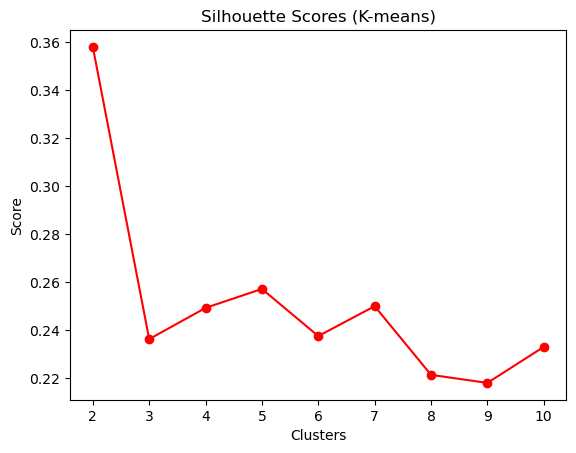

In [18]:
#  K-Means - Optimal K (Elbow & Silhouette)
inertia = []
for k in range(1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_model.fit(feature_scaled)
    inertia.append(kmeans_model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

silhouette_scores = {k: silhouette_score(feature_scaled, KMeans(n_clusters=k, random_state=42, n_init=10).fit_predict(feature_scaled)) for k in range(2, 11)}
optimal_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Optimal K (K-means): {optimal_k}")

plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', color='red')
plt.title('Silhouette Scores (K-means)')
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.show()


In [19]:
# Final K-means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df1['KMeans_Cluster'] = kmeans.fit_predict(feature_scaled)
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,log_income,log_gdpp,KMeans_Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,7.383989,6.315358,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,9.203316,8.316300,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,9.464983,8.402904,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,8.682708,8.169053,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,9.857444,9.409191,0


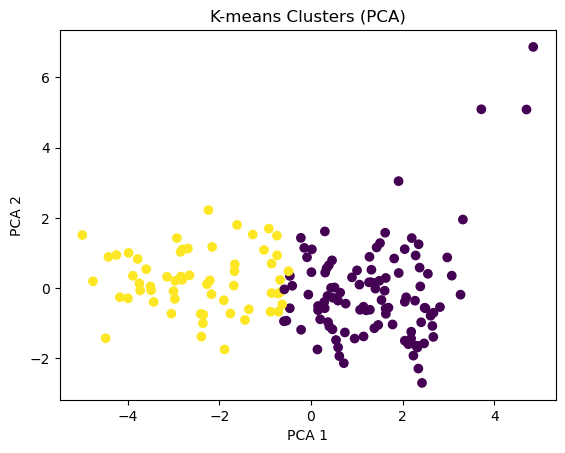

In [20]:
# PCA visualization
pca = PCA(n_components=2)
feature_pca = pca.fit_transform(feature_scaled)
plt.scatter(feature_pca[:, 0], feature_pca[:, 1], c=df1['KMeans_Cluster'], cmap='viridis')
plt.title("K-means Clusters (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [21]:
# Cluster summary
km_summary = df1.groupby('KMeans_Cluster').mean(numeric_only=True).drop(columns=['log_income', 'log_gdpp'])
print("\nK-means Cluster Summary:\n", km_summary)


K-means Cluster Summary:
                 child_mort    exports    health    imports        income  \
KMeans_Cluster                                                             
0                13.927103  47.626168  7.158224  48.940187  24674.392523   
1                81.681667  29.486650  6.204833  43.234432   3716.716667   

                inflation  life_expec  total_fer          gdpp  
KMeans_Cluster                                                  
0                5.586458    75.85514   2.035794  19249.158879  
1               11.696917    61.10500   4.574667   1755.900000  


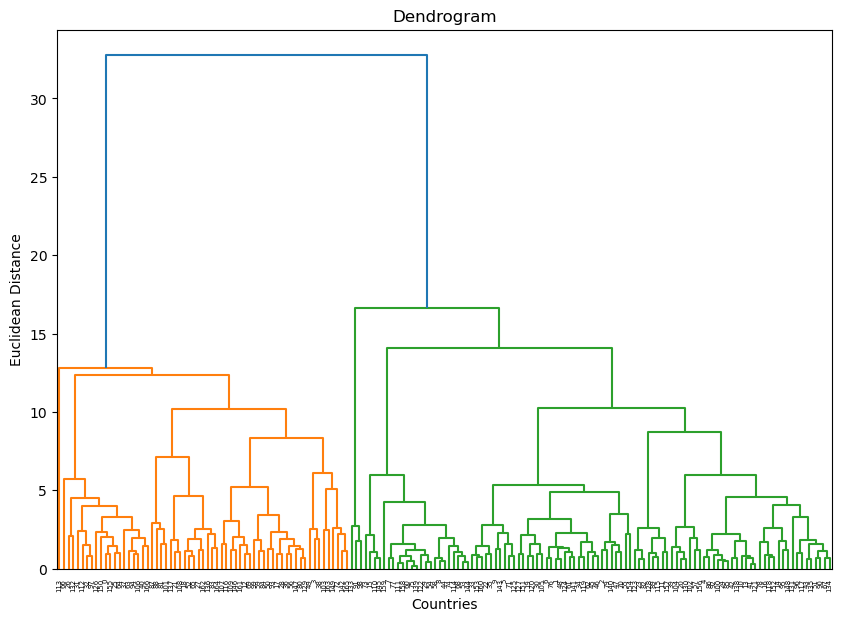

In [22]:
#  Hierarchical Clustering
# Dendrogram
plt.figure(figsize=(10, 7))
linkage_matrix = sch.linkage(feature_scaled, method='ward')
sch.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distance')
plt.show()

In [23]:
silhouette_scores_hc = {k: silhouette_score(feature_scaled, AgglomerativeClustering(n_clusters=k, linkage='ward').fit_predict(feature_scaled)) for k in range(2, 11)}
optimal_k_hc = max(silhouette_scores_hc, key=silhouette_scores_hc.get)
print(f"Optimal K (Hierarchical): {optimal_k_hc}")


Optimal K (Hierarchical): 3


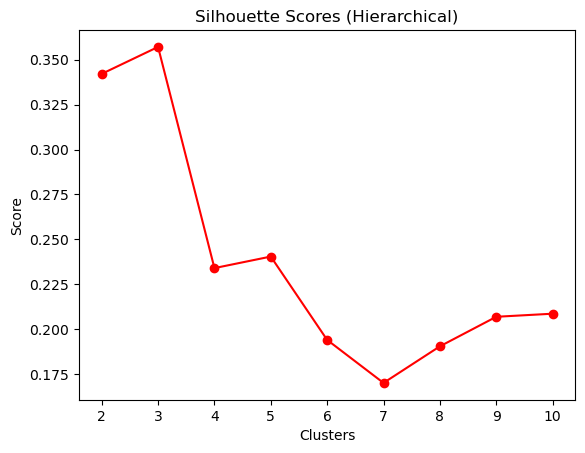

In [24]:
plt.plot(list(silhouette_scores_hc.keys()), list(silhouette_scores_hc.values()), marker='o', color='red')
plt.title('Silhouette Scores (Hierarchical)')
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.show()

In [25]:
hc = AgglomerativeClustering(n_clusters=optimal_k_hc, linkage='ward')
df1['HC_Cluster'] = hc.fit_predict(feature_scaled)
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,log_income,log_gdpp,KMeans_Cluster,HC_Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,7.383989,6.315358,1,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,9.203316,8.316300,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,9.464983,8.402904,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,8.682708,8.169053,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,9.857444,9.409191,0,0


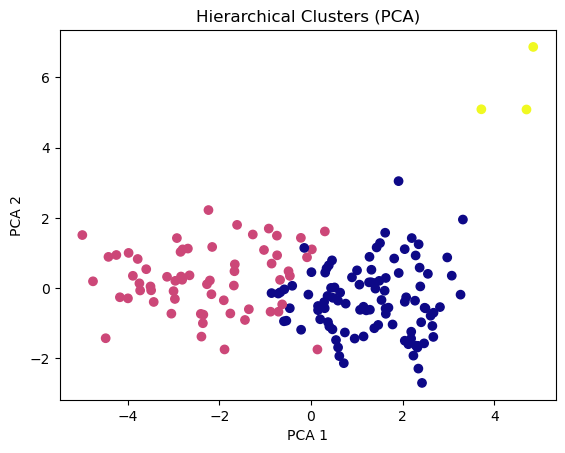

In [26]:
# PCA Visualization (reuse K-means PCA)
plt.scatter(feature_pca[:, 0], feature_pca[:, 1], c=df1['HC_Cluster'], cmap='plasma')
plt.title("Hierarchical Clusters (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [27]:
hc_summary = df1.groupby('HC_Cluster').mean(numeric_only=True).drop(columns=['KMeans_Cluster', 'log_income', 'log_gdpp'])
print("\nHierarchical Cluster Summary:\n", hc_summary)


Hierarchical Cluster Summary:
             child_mort     exports    health     imports        income  \
HC_Cluster                                                               
0            14.086139   43.622772  7.148614   44.491089  23966.039604   
1            78.666667   30.655540  6.283016   45.508983   3976.079365   
2             4.133333  176.000000  6.793333  156.666667  64033.333333   

            inflation  life_expec  total_fer          gdpp  
HC_Cluster                                                  
0            5.317594   75.912871   2.070594  18512.772277  
1           11.985476   61.449206   4.429206   1944.825397  
2            2.468000   81.433333   1.380000  57566.666667  


In [28]:
#  Need Score Calculation
cols = ['child_mort', 'total_fer', 'income', 'gdpp', 'life_expec']

#  K-means 
km_summary_std = km_summary.copy()
km_summary_std[cols] = scaler.fit_transform(km_summary[cols])
km_summary_std['need_score'] = (
    km_summary_std['child_mort'] +
    km_summary_std['total_fer'] -
    km_summary_std['income'] -
    km_summary_std['gdpp'] -
    km_summary_std['life_expec']
)
most_in_need_cluster_km = km_summary_std['need_score'].idxmax()
km_in_need_countries = df1.loc[df1['KMeans_Cluster'] == most_in_need_cluster_km, 'country'].values

print("\nMost in need countries (K-means):")
print(km_in_need_countries)
print(f"Total: {len(km_in_need_countries)} countries")

# Hierarchical
hc_summary_std = hc_summary.copy()
hc_summary_std[cols] = scaler.fit_transform(hc_summary[cols])
hc_summary_std['need_score'] = (
    hc_summary_std['child_mort'] +
    hc_summary_std['total_fer'] -
    hc_summary_std['income'] -
    hc_summary_std['gdpp'] -
    hc_summary_std['life_expec']
)
most_in_need_cluster_hc = hc_summary_std['need_score'].idxmax()
hc_in_need_countries = df1.loc[df1['HC_Cluster'] == most_in_need_cluster_hc, 'country'].values

print("\nMost in need countries (Hierarchical):")
print(hc_in_need_countries)
print(f"Total: {len(hc_in_need_countries)} countries")

# Common countries 
common_in_need_countries = set(km_in_need_countries) & set(hc_in_need_countries)
print("\nCommon 'In Need' countries in both:")
print(sorted(common_in_need_countries))
print(f"Total common: {len(common_in_need_countries)} countries")


Most in need countries (K-means):
['Afghanistan' 'Angola' 'Bangladesh' 'Benin' 'Bolivia' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Central African Republic' 'Chad'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' "Cote d'Ivoire"
 'Equatorial Guinea' 'Eritrea' 'Gabon' 'Gambia' 'Ghana' 'Guinea'
 'Guinea-Bissau' 'Haiti' 'India' 'Iraq' 'Kenya' 'Kiribati'
 'Kyrgyz Republic' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Micronesia, Fed. Sts.' 'Mongolia' 'Mozambique' 'Myanmar'
 'Namibia' 'Nepal' 'Niger' 'Nigeria' 'Pakistan' 'Philippines' 'Rwanda'
 'Senegal' 'Sierra Leone' 'Solomon Islands' 'South Africa' 'Sudan'
 'Tajikistan' 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda' 'Uzbekistan'
 'Vanuatu' 'Yemen' 'Zambia']
Total: 60 countries

Most in need countries (Hierarchical):
['Afghanistan' 'Angola' 'Bangladesh' 'Benin' 'Bhutan' 'Botswana'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Central African Republic'
 'Chad' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' "Cote d'Ivoi

In [29]:
# Label Clusters & Combine Results
# K-Means labels
developed_cluster_km = km_summary_std['need_score'].idxmin()
km_labels = {
    most_in_need_cluster_km: 'In Need',
    developed_cluster_km: 'Developed'
}
df['KMeans_Label'] = df1['KMeans_Cluster'].map(km_labels)

# HC labels
hc_summary_sorted = hc_summary_std.sort_values('need_score', ascending=False)
most_in_need_cluster_hc = hc_summary_sorted.index[0]
developed_cluster_hc = hc_summary_sorted.index[-1]
emerging_cluster_hc = hc_summary_sorted.index[1]
hc_labels = {
    most_in_need_cluster_hc: 'In Need',
    developed_cluster_hc: 'Developed',
    emerging_cluster_hc: 'Emerging'
}
df['HC_Label'] = df1['HC_Cluster'].map(hc_labels)

# Common 'In Need' flag
df['Common_InNeed'] = (df['KMeans_Label'] == 'In Need') & (df['HC_Label'] == 'In Need')

# Priority mapping
priority_map_km = {'In Need': 0, 'Developed': 1}
priority_map_hc = {'In Need': 0, 'Emerging': 1, 'Developed': 2}

df['KMeans_Priority'] = df['KMeans_Label'].map(priority_map_km)
df['HC_Priority'] = df['HC_Label'].map(priority_map_hc)

# Sort order: Common "In Need" first, then by KMeans & HC priorities
df_sorted = df.sort_values(
    by=['Common_InNeed', 'KMeans_Priority', 'HC_Priority'],
    ascending=[False, True, True]
)

# Drop helper priority columns
df_sorted = df_sorted.drop(columns=['KMeans_Priority', 'HC_Priority'])

# Save one combined CSV
df_sorted.to_csv('countries_with_clusters_combined.csv', index=False)

print("\nFinal combined CSV saved successfully as 'countries_with_clusters_combined.csv'.")


Final combined CSV saved successfully as 'countries_with_clusters_combined.csv'.
